## Insight for Cab Investment Firm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.2f}'.format

#### Reading csv files

In [3]:
df = pd.read_csv('Cab_Data.csv')

In [5]:
df2 = pd.read_csv('City.csv')

In [7]:
df3 = pd.read_csv('Customer_ID.csv')

In [10]:
df4 = pd.read_csv('Transaction_ID.csv')

#### Merging csv files to create a master file based on transaction ID

In [10]:
df5= pd.merge(df3,df4, on = ['Customer ID'])

In [11]:
df6= pd.merge(df,df5, on = ['Transaction ID'])

In [12]:
dff= pd.merge(df2,df6, on = ['City'])

In [13]:
shape = dff.shape
print(shape)

(359392, 14)


#### Converting xlsx date to datetime

In [14]:
dff['Date of Travel'] = pd.to_datetime(dff['Date of Travel'], unit='D', origin='1899-12-30')

## EDA


#### Observing data types

In [15]:
dff.dtypes

City                          object
Population                    object
Users                         object
Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Payment_Mode                  object
dtype: object

#### Creating histograms to help identify outliers

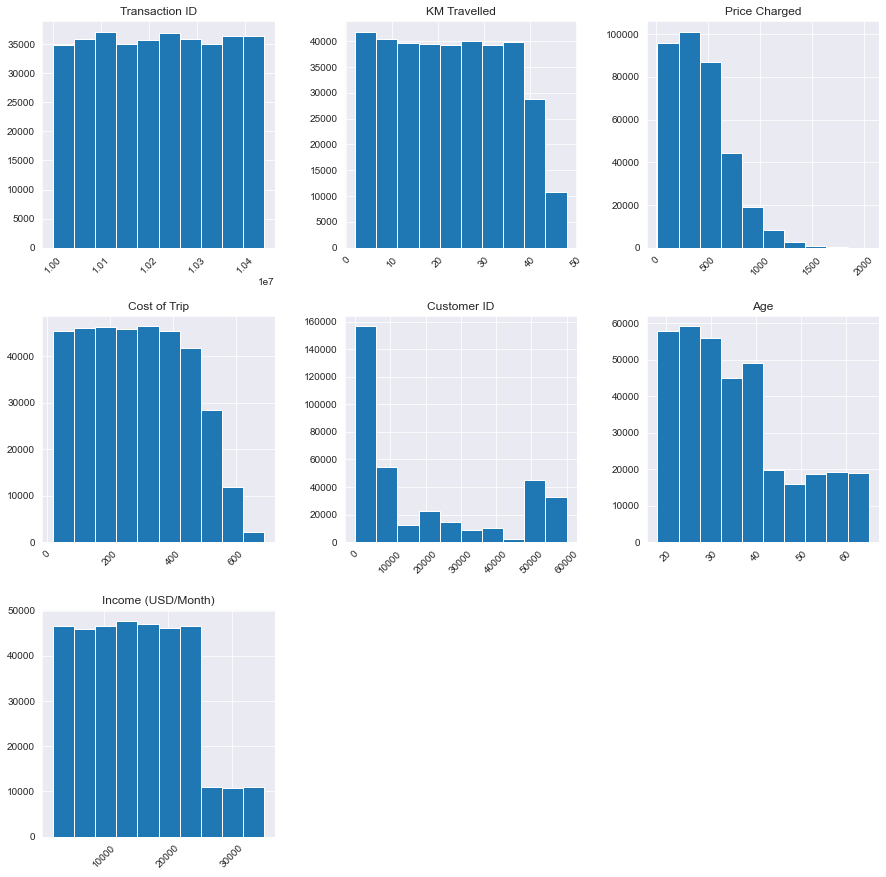

In [16]:
dff.hist(figsize=(15,15), xrot=45)
plt.show()

In [17]:
dff.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,"359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00"
mean,"10,220,761.19",22.57,423.44,286.19,"19,191.65",35.34,"15,048.82"
std,"126,805.80",12.23,274.38,157.99,"21,012.41",12.59,"7,969.41"
min,"10,000,011.00",1.90,15.60,19.00,1.00,18.00,"2,000.00"
25%,"10,110,809.75",12.00,206.44,151.20,"2,705.00",25.00,"8,424.00"
50%,"10,221,035.50",22.44,386.36,282.48,"7,459.00",33.00,"14,685.00"
75%,"10,330,937.25",32.96,583.66,413.68,"36,078.00",42.00,"21,035.00"
max,"10,440,107.00",48.00,"2,048.03",691.20,"60,000.00",65.00,"35,000.00"


In [18]:
dff.describe(include='object')

,City,Population,Users,Company,Gender,Payment_Mode
count,359392,359392,359392,359392,359392,359392
unique,19,19,19,2,2,2
top,NEW YORK NY,"8,405,837","302,149",Yellow Cab,Male,Card
freq,99885,99885,99885,274681,205912,215504


In [19]:
#Table above identifies top city, company, gender, and payment method

#### Check for NaN values

In [20]:
is_null = dff.isnull().values.any()
print(is_null)

False


#### Check for duplciate transactions- there are none

In [21]:
dup = dff[dff.duplicated(['Transaction ID'], keep=False)]
display(dup)

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode


#### Creating new column for profit

In [22]:
dff['Profit'] = dff['Price Charged']- dff['Cost of Trip']

In [23]:
out = dff[dff['Profit']<0]['Profit'].count()
print(f"There are {out} outliers where the cost of the trip exceeds the price charged.")

There are 24819 outliers where the cost of the trip exceeds the price charged.


#### Table examining company profits

In [24]:
pf = dff.pivot_table(index='Company',aggfunc = {'Profit': sum , 'Transaction ID': 'count'})
pf.rename(columns = {'Transaction ID':'Total Rides'},inplace=True)
pf['Profit per Ride'] = pf['Profit']/pf['Total Rides']
display(pf)

,Profit,Total Rides,Profit per Ride
Company,,,
Pink Cab,"5,307,328.32",84711,62.65
Yellow Cab,"44,020,373.17",274681,160.26


In [25]:
dff.to_csv('Main.csv',index=False)

In [28]:
%%html
<div class='tableauPlaceholder' id='viz1673650018358' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G2&#47;G2MInsightforCabCompanies&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='G2MInsightforCabCompanies&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G2&#47;G2MInsightforCabCompanies&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673650018358');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1327px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [31]:
%%html
<div class='tableauPlaceholder' id='viz1673650781049' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G2&#47;G2MInsightforCabCompanies&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='G2MInsightforCabCompanies&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;G2&#47;G2MInsightforCabCompanies&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1673650781049');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>